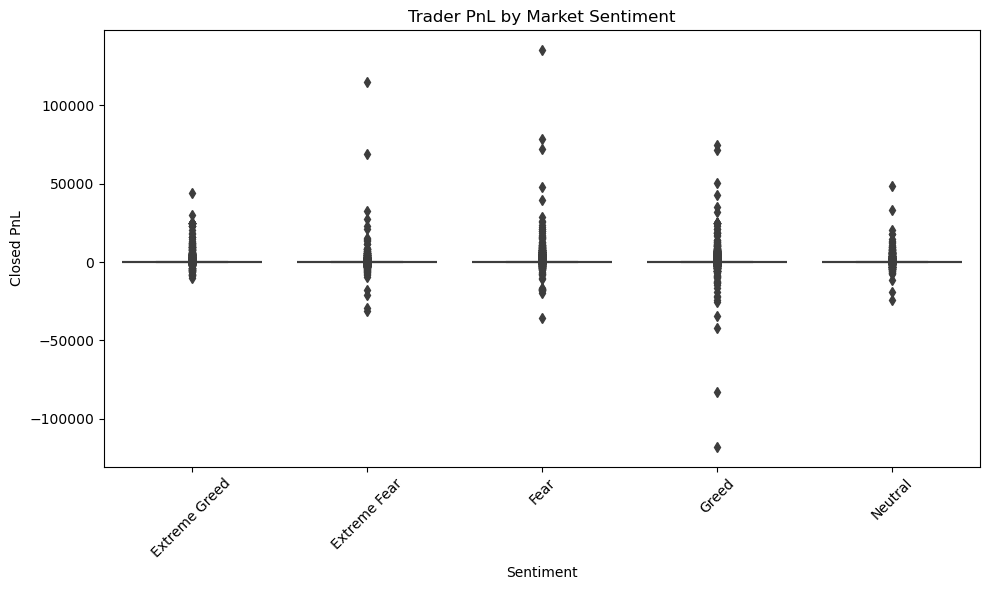

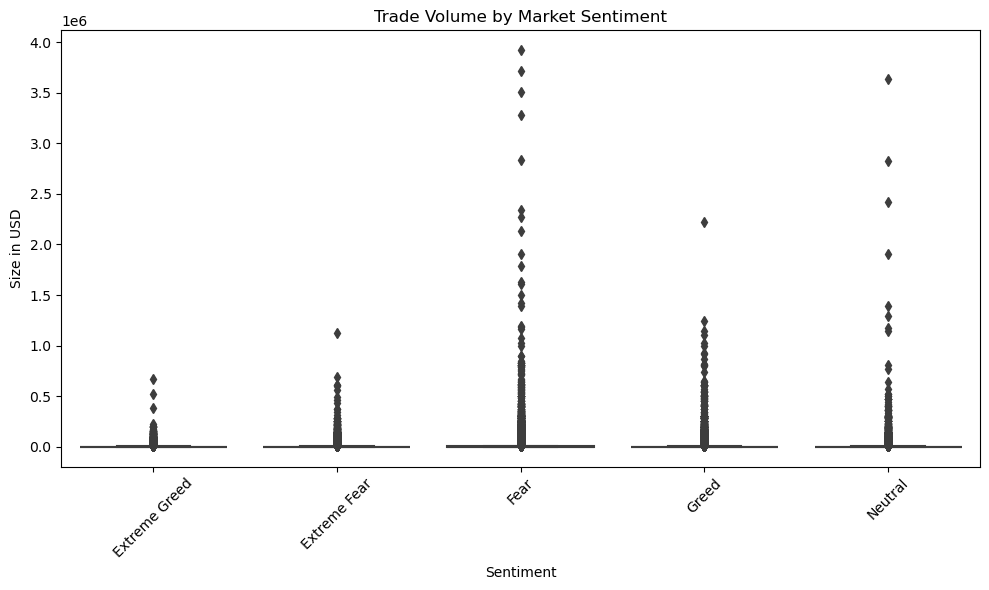

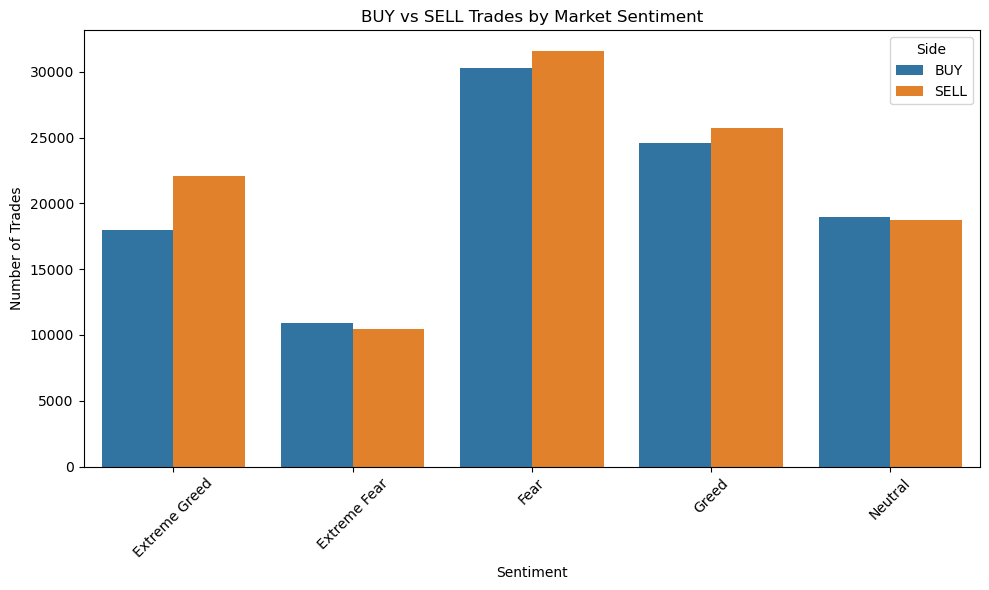

In [ ]:
# Devraj Choudhary - Web3 Data Science Assignment

#  Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#  File Paths
TRADER_PATH = 'csv_files/historical_data.csv'
SENTIMENT_PATH = 'csv_files/fear_greed_index.csv'
OUTPUT_PATH = 'outputs/'

# Ensure outputs directory exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

#  Load Data
trader_data = pd.read_csv(TRADER_PATH)
sentiment_data = pd.read_csv(SENTIMENT_PATH)

#  Preprocessing
trader_data['date'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

#  Merge Datasets
merged_data = pd.merge(
    trader_data,
    sentiment_data[['date', 'classification', 'value']],
    on='date',
    how='inner'
)

#  Clean & Filter
merged_data['classification'] = merged_data['classification'].str.strip().str.title()
merged_data['Side'] = merged_data['Side'].str.strip().str.upper()
filtered_data = merged_data[merged_data['Side'].isin(['BUY', 'SELL'])]

#  Save merged dataset
merged_data.to_csv('csv_files/merged_data.csv', index=False)

#  Plot 1: PnL vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='classification', y='Closed PnL')
plt.title('Trader PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}pnl_by_sentiment.png')
plt.show()

#  Plot 2: Volume vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='classification', y='Size USD')
plt.title('Trade Volume by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Size in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}volume_by_sentiment.png')
plt.show()

#  Plot 3: Side Count vs Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='classification', hue='Side')
plt.title('BUY vs SELL Trades by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}side_distribution_by_sentiment.png')
plt.show()
